# 基本操作

In [2]:
import torch
import numpy as np
# 比较torch数据和numpy数据
numpy_data = np.arange(6).reshape(2,3)
torch_data = torch.from_numpy(numpy_data)
print("\nnumpy data = \n",numpy_data)
print("\ntorch data = \n",torch_data)

# 将torch数据转为numpy数据
to_numpy = torch_data.numpy()
print("\n转换后 \n",to_numpy)





numpy data = 
 [[0 1 2]
 [3 4 5]]

torch data = 
 tensor([[0, 1, 2],
        [3, 4, 5]])

转换后 
 [[0 1 2]
 [3 4 5]]


In [3]:
data = [-1,-2,3,4]
tensor = torch.FloatTensor(data)
print(tensor)
# 各种常用操作
print(torch.abs(tensor))
print(torch.sin(tensor))
print(torch.mean(tensor))

tensor([-1., -2.,  3.,  4.])
tensor([1., 2., 3., 4.])
tensor([-0.8415, -0.9093,  0.1411, -0.7568])
tensor(1.)


In [4]:
data = [[1,2],[3,4]]
tensor = torch.FloatTensor(data)
print("矩阵相乘=\n",torch.mm(tensor,tensor))
# 下行代码会报错，注意torch里的dot只接受一维的张量，进行内积运算
# print("dot = ",tensor.dot(tensor))
data2 = np.array(data).flatten() # 展开形成一维的张量
tensor2 = torch.FloatTensor(data2)
print("dot = ",tensor2.dot(tensor2))


矩阵相乘=
 tensor([[ 7., 10.],
        [15., 22.]])
dot =  tensor(30.)


# 变量

In [5]:
import torch
from torch.autograd import Variable
tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor,requires_grad=True)
print(tensor)
print(variable)
print()

# 变量可以反向传播，普通的tensor不行
t_out = torch.mean(tensor * tensor)
v_out = torch.mean(variable * variable)
print(t_out)
print(v_out)
print()

# 误差反向传递 
v_out.backward()
'''
v_out = 1/4 * sum(var,var)
d(v_out)/d(var) = 1/4 * 2 * var = var/2
'''
print(variable.grad)
print(variable)
print(variable.data)
print(variable.data.numpy())

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]])
[[1. 2.]
 [3. 4.]]


In [6]:
'''
注意每次反向传播求完梯度后要记得清空，否则梯度会在原来的程度上累加！！！
如果出现 RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
该问题是指在默认情况下，网络在反向传播中不允许多个backward()。需要在第一个backward设置retain_graph=True
'''
tensor = torch.FloatTensor([[1,2],[3,4]])
v1 = Variable(tensor,requires_grad=True)
res = torch.mean(v1*v1)
res.backward(retain_graph=True)
print(v1.grad)
res.backward()
print(v1.grad)


tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
tensor([[1., 2.],
        [3., 4.]])


# 激活函数

/home/zelin/mytorch/torch/lib64/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/zelin/mytorch/torch/lib64/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


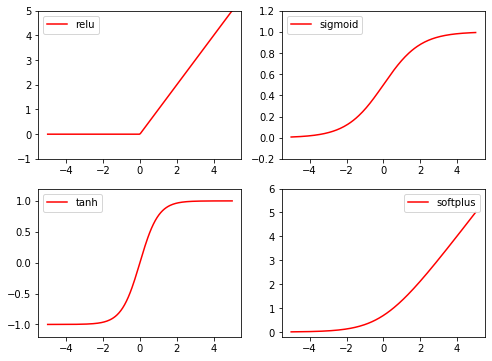

In [7]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
x = torch.linspace(-5,5,200)
x = Variable(x)
x_np = x.data.numpy()

y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

plt.figure(1,figsize=(8,6))
plt.subplot(221)
plt.plot(x_np,y_relu,c='red',label = 'relu')
plt.ylim((-1,5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np,y_sigmoid,c='red',label='sigmoid')
plt.ylim((-0.2,1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np,y_tanh,c='red',label='tanh')
plt.ylim((-1.2,1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np,y_softplus,c='red',label='softplus')
plt.ylim((-0.2,6))
plt.legend(loc='best')

# squeeze和unsqueeze函数
squeeze()-降维

unsqueeze()-升维

In [8]:
'''
squeeze 表示去除掉维度值为1的维度
'''
a = torch.FloatTensor([[[1,2,3]]])
print(a.shape,"a=",a)
b = a.squeeze()
print(b.shape,"b=",b)
print()
'''
unsqueeze 表示在指定dim(从0开始)上增加一个纬度值为1的维度
'''
print(b.shape,"b=",b)
c = b.unsqueeze(dim=0)
print(c.shape,"c=",c)
d = b.unsqueeze(dim=1)
print(d.shape,"d=",d)

torch.Size([1, 1, 3]) a= tensor([[[1., 2., 3.]]])
torch.Size([3]) b= tensor([1., 2., 3.])

torch.Size([3]) b= tensor([1., 2., 3.])
torch.Size([1, 3]) c= tensor([[1., 2., 3.]])
torch.Size([3, 1]) d= tensor([[1.],
        [2.],
        [3.]])
